In [1]:
import seaborn as sns

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
titanic_df=sns.load_dataset('titanic')
titanic_df=pd.DataFrame(titanic_df)
print(titanic_df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [13]:
titanic_df.shape
titanic_df.info()
titanic_df.describe()
titanic_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
titanic_df['age'] = titanic_df['age'].fillna(titanic_df['age'].mean())

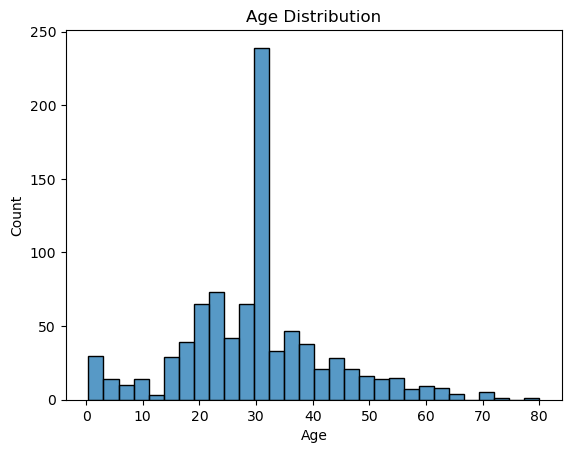

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.histplot(data=titanic_df, x='age', bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


Most passengers were between 20 and 40 years old.

Very high spike around 29-30 years — probably because missing ages were filled with the mean (~29.7).

Very few very young (0-10 years) and very old (above 65 years) passengers.

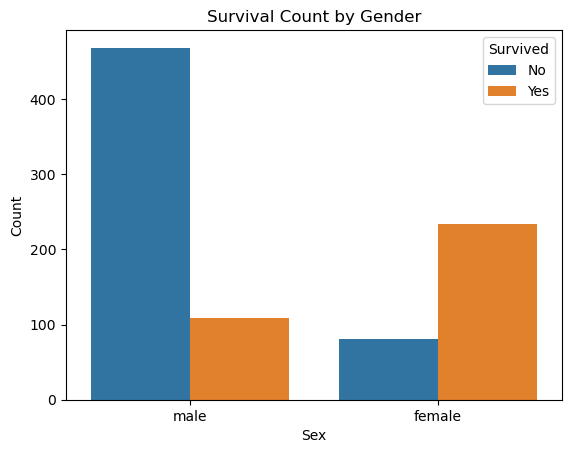

In [45]:
plt.figure()
sns.countplot(data=titanic_df, x='sex', hue='survived')
plt.title('Survival Count by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


Females had much higher survival rates compared to males.

Males died more (higher blue bar for males at Survived=0).

Females survived more (higher orange bar for females at Survived=1).



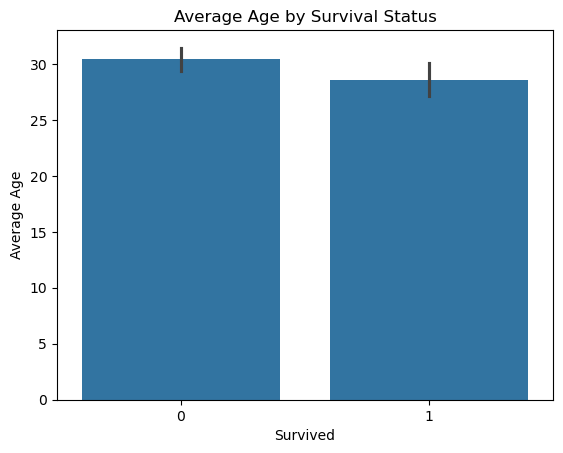

In [65]:
plt.figure()
sns.barplot(data=titanic_df, x='survived', y='age')
plt.title('Average Age by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Average Age')
plt.show()


Average age of survivors 28 is slightly lower than non-survivors 31.

But the difference is not very large.

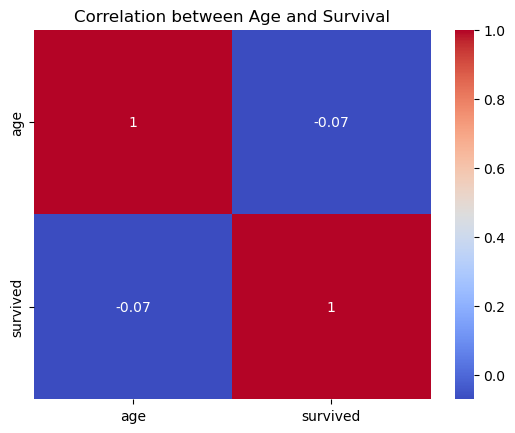

In [69]:
plt.figure()
sns.heatmap(titanic_df[['age', 'survived']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Age and Survival')
plt.show()


Correlation = -0.07 (very weak negative correlation).



In [17]:

X = titanic_df[['sex', 'age']]
y = titanic_df['survived']


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [21]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

ohe = OneHotEncoder(sparse_output=False)
sex_encoded_train = ohe.fit_transform(X_train[['sex']])
sex_encoded_test = ohe.transform(X_test[['sex']])
sex_encoded_train_df = pd.DataFrame(
    sex_encoded_train,
    columns=ohe.get_feature_names_out(['sex']),
    index=X_train.index
)
sex_encoded_test_df = pd.DataFrame(
    sex_encoded_test,
    columns=ohe.get_feature_names_out(['sex']),
    index=X_test.index
)
X_train = pd.concat([X_train.drop(columns=['sex']), sex_encoded_train_df], axis=1)
X_test = pd.concat([X_test.drop(columns=['sex']), sex_encoded_test_df], axis=1)


In [33]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN: {accuracy *100:.4f}")

Accuracy of KNN: 77.0950


In [35]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)  
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN: {accuracy *100:.4f}")

Accuracy of KNN: 75.9777


In [37]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)  
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN: {accuracy *100:.4f}")

Accuracy of KNN: 75.9777


In [39]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)  
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN: {accuracy *100:.4f}")

Accuracy of KNN: 76.5363
